In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize

# Equation
$S'=-\beta IS$

$I'=\beta IS - \gamma I$

$R' = \gamma I$




# Start values

In [2]:
N = 763
S_0 = np.double(762)
I_0 = np.double(1)
R_0 = np.double(0)
beta = np.double(1) #transmission rate
gamma = np.double(1/7) # recovery rate
h = np.double(0.2)
t = np.arange(0,15)

# Explicit Euler's method

In [3]:
S_explicit_euler = np.zeros(len(t), dtype=np.double)
I_explicit_euler = np.zeros(len(t), dtype=np.double)
R_explicit_euler = np.zeros(len(t), dtype=np.double)

S_explicit_euler[0] = S_0
I_explicit_euler[0] = I_0
R_explicit_euler[0] = R_0

In [4]:
for i in range(1,len(t)):
    S_explicit_euler[i] = S_explicit_euler[i-1] - h * beta * S_explicit_euler[i-1] * I_explicit_euler[i-1]
    I_explicit_euler[i] = I_explicit_euler[i-1] + h * (beta * S_explicit_euler[i-1] * I_explicit_euler[i-1] - gamma * I_explicit_euler[i-1])
    R_explicit_euler[i] = R_explicit_euler[i-1] + h * gamma * I_explicit_euler[i-1]
    # if S_explicit_euler[i] < 0:
    #     S_explicit_euler[i] = 0
    # if I_explicit_euler[i] < 0:
    #     I_explicit_euler = 0
    # if R_explicit_euler[i] < 0:
    #     R_explicit_euler = 0

/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/345542637.py:2: RuntimeWarning: overflow encountered in scalar multiply
  S_explicit_euler[i] = S_explicit_euler[i-1] - h * beta * S_explicit_euler[i-1] * I_explicit_euler[i-1]
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/345542637.py:3: RuntimeWarning: overflow encountered in scalar multiply
  I_explicit_euler[i] = I_explicit_euler[i-1] + h * (beta * S_explicit_euler[i-1] * I_explicit_euler[i-1] - gamma * I_explicit_euler[i-1])
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/345542637.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  I_explicit_euler[i] = I_explicit_euler[i-1] + h * (beta * S_explicit_euler[i-1] * I_explicit_euler[i-1] - gamma * I_explicit_euler[i-1])


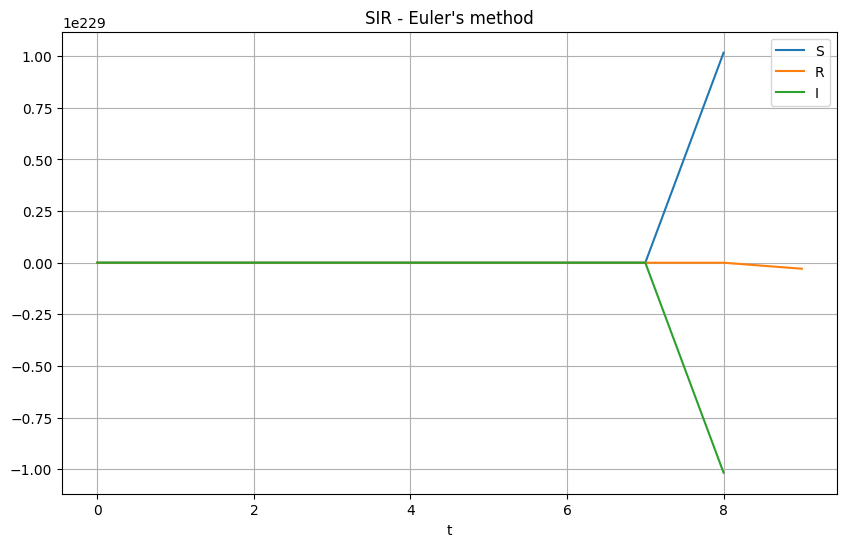

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t,S_explicit_euler, label="S")
plt.plot(t,R_explicit_euler, label="R")
plt.plot(t,I_explicit_euler, label="I")
plt.grid()
plt.legend()
plt.xlabel("t")
plt.title("SIR - Euler's method")
plt.show()

/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/4130168008.py:2: RuntimeWarning: invalid value encountered in add
  plt.plot(t, S_explicit_euler + I_explicit_euler + R_explicit_euler, label="R + S + I")


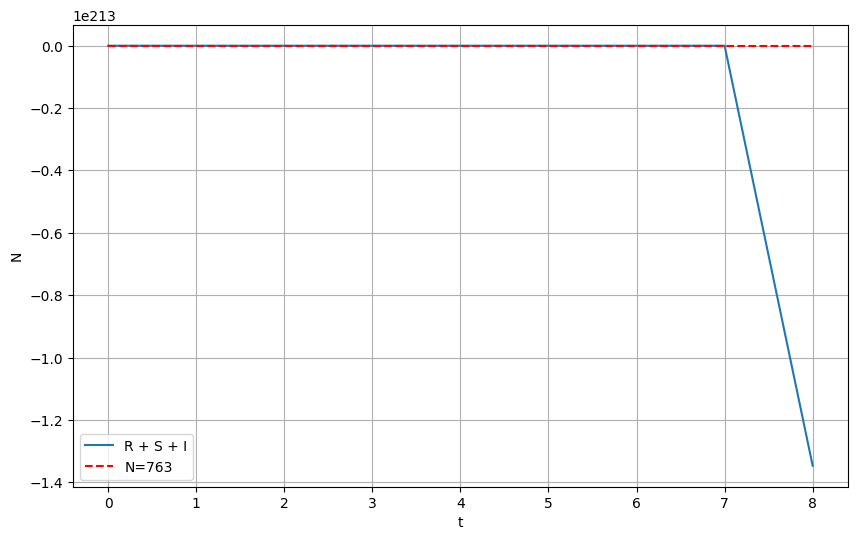

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(t, S_explicit_euler + I_explicit_euler + R_explicit_euler, label="R + S + I")
plt.hlines(763,0,8,colors="red", linestyles="dashed", label=f"N={N}")
plt.grid()
plt.legend()
plt.xlabel("t")
plt.ylabel("N")
plt.show()

In [29]:
pd.options.display.float_format = '{:.2f}'.format
N_explicit_euler = pd.DataFrame(S_explicit_euler + I_explicit_euler + R_explicit_euler, columns=["N"])
N_explicit_euler.to_csv("N_explicit.csv")

/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1076883150.py:2: RuntimeWarning: invalid value encountered in add
  N_explicit_euler = pd.DataFrame(S_explicit_euler + I_explicit_euler + R_explicit_euler, columns=["N"])


# Implicit Euler's method

In [7]:
S_implicit_euler = np.zeros(len(t), dtype=np.double)
I_implicit_euler = np.zeros(len(t), dtype=np.double)
R_implicit_euler = np.zeros(len(t), dtype=np.double)

S_implicit_euler[0] = S_0
I_implicit_euler[0] = I_0
R_implicit_euler[0] = R_0

In [8]:
def equations(vars, S_prev, I_prev, R_prev, beta, gamma, dt):
    S_next, I_next, R_next = vars
    eq1 = S_next - S_prev + dt * beta * I_next * S_next
    eq2 = I_next - I_prev - dt * (beta * I_next * S_next - gamma * I_next)
    eq3 = R_next - R_prev - dt * gamma * I_next
    return [eq1, eq2, eq3]

In [9]:
for i in range(1, len(t)):
    S_prev = S_implicit_euler[i-1]
    I_prev = I_implicit_euler[i-1]
    R_prev = R_implicit_euler[i-1]
    S_next, I_next, R_next = fsolve(equations, (S_prev, I_prev, R_prev), args=(S_prev, I_prev, R_prev, beta, gamma, h))
    S_implicit_euler[i] = S_next
    I_implicit_euler[i] = I_next
    R_implicit_euler[i] = R_next

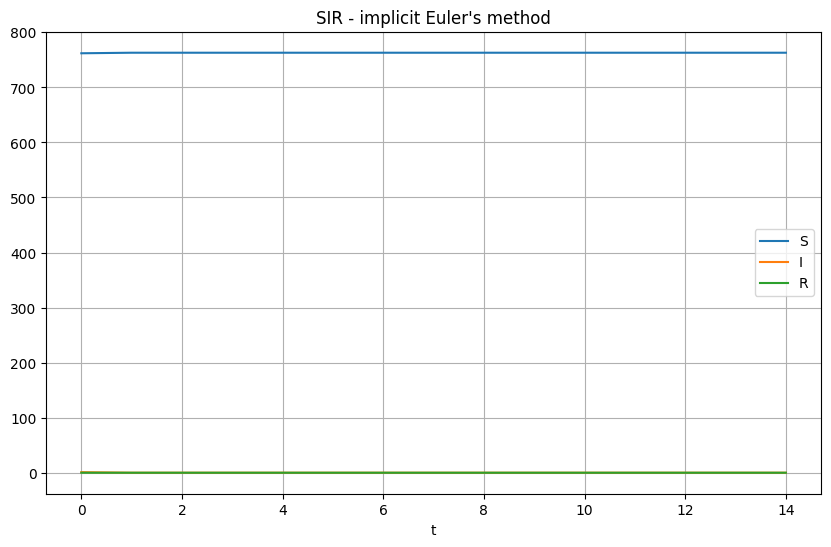

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(t, S_implicit_euler, label="S")
plt.plot(t, I_implicit_euler, label="I")
plt.plot(t, R_implicit_euler, label="R")
plt.xlabel("t")
plt.title("SIR - implicit Euler's method")
plt.legend()
plt.grid()
plt.show()

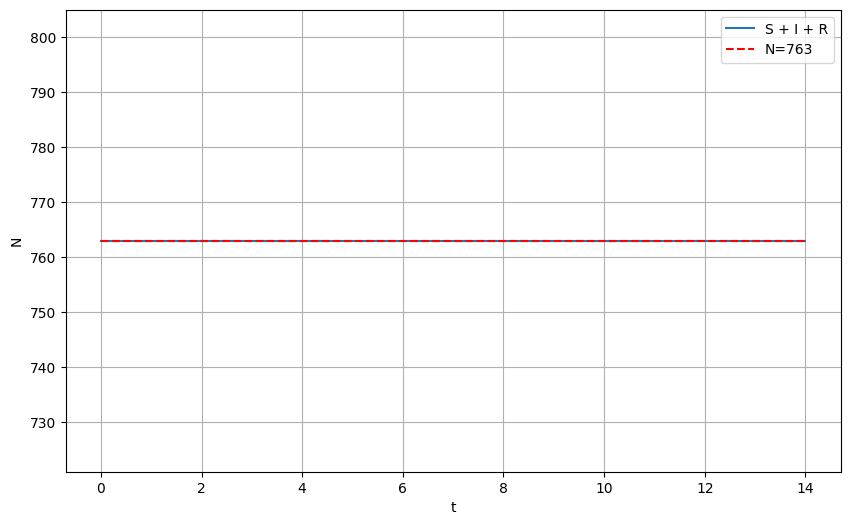

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(t, S_implicit_euler + I_implicit_euler + R_implicit_euler, label="S + I + R")
plt.hlines(763,0,14,colors="red", linestyles="dashed", label=f"N={N}")
plt.xlabel("t")
plt.ylabel("N")
plt.legend()
plt.grid()
plt.show()

In [34]:
N_implicit_euler = pd.DataFrame(np.round(S_implicit_euler + I_implicit_euler + R_implicit_euler), columns=["N"])
N_implicit_euler.to_csv("N_implicit.csv")

# Runge-Kutta's method

In [12]:
S_RG = np.zeros(len(t), dtype=np.double)
R_RG = np.zeros(len(t), dtype=np.double)
I_RG = np.zeros(len(t), dtype=np.double)

S_RG[0] = S_0
R_RG[0] = R_0
I_RG[0] = I_0

/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return -beta * S * I
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return beta * S * I - gamma * I
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return beta * S * I - gamma * I


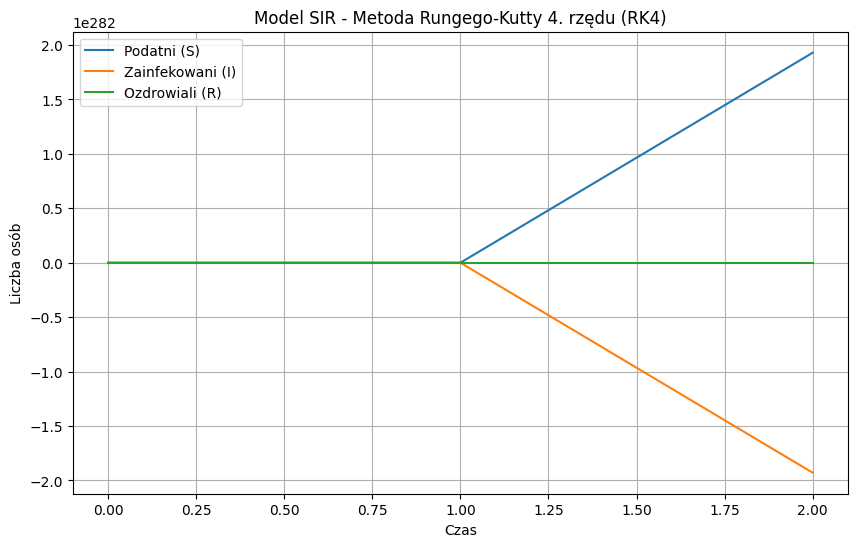

In [13]:
def dS_dt(S, I, beta):
    return -beta * S * I

def dI_dt(S, I, beta, gamma):
    return beta * S * I - gamma * I

def dR_dt(I, gamma):
    return gamma * I

# Metoda Rungego-Kutty czwartego rzędu (RK4)
for i in range(1, len(t)):
    S_prev = S_RG[i-1]
    I_prev = I_RG[i-1]
    R_prev = R_RG[i-1]
    
    # Obliczenie współczynników RK4 dla S, I, R
    k1_S = dS_dt(S_prev, I_prev, beta)
    k1_I = dI_dt(S_prev, I_prev, beta, gamma)
    k1_R = dR_dt(I_prev, gamma)
    
    k2_S = dS_dt(S_prev + 0.5 * k1_S, I_prev + 0.5 * k1_I, beta)
    k2_I = dI_dt(S_prev + 0.5 * k1_S, I_prev + 0.5 * k1_I, beta, gamma)
    k2_R = dR_dt(I_prev + 0.5 * k1_I, gamma)
    
    k3_S = dS_dt(S_prev + 0.5 * k2_S, I_prev + 0.5 * k2_I, beta)
    k3_I = dI_dt(S_prev + 0.5 * k2_S, I_prev + 0.5 * k2_I, beta, gamma)
    k3_R = dR_dt(I_prev + 0.5 * k2_I, gamma)
    
    k4_S = dS_dt(S_prev + k3_S, I_prev + k3_I, beta)
    k4_I = dI_dt(S_prev + k3_S, I_prev + k3_I, beta, gamma)
    k4_R = dR_dt(I_prev + k3_I, gamma) 
    
    S_RG[i] = S_prev + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6 * h
    I_RG[i] = I_prev + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6 * h
    R_RG[i] = R_prev + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6 * h

# Rysowanie wyników
plt.figure(figsize=(10, 6))
plt.plot(t, S_RG, label='Podatni (S)')
plt.plot(t, I_RG, label='Zainfekowani (I)')
plt.plot(t, R_RG, label='Ozdrowiali (R)')
plt.xlabel('Czas')
plt.ylabel('Liczba osób')
plt.title('Model SIR - Metoda Rungego-Kutty 4. rzędu (RK4)')
plt.legend()
plt.grid()
plt.show()


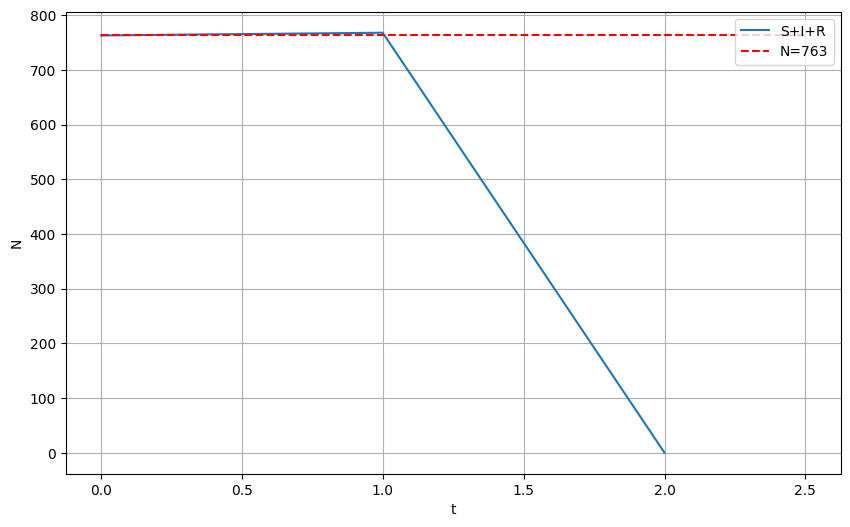

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(t, R_RG+S_RG+I_RG,label="S+I+R")
plt.grid()
plt.hlines(763,0,2.5,colors="red", linestyles="dashed",label=f"N={N}")
plt.legend()
plt.xlabel("t")
plt.ylabel("N")
plt.show()

In [36]:
N_RK = pd.DataFrame(S_RG + I_RG + R_RG, columns=["N"])
N_RK.to_csv("N_RK.csv")

In [15]:
I_true = np.array([1,  3,  6,  25,  73,  222,  294,  258,  237,  191,  125,  69,  27,  11,  4])

In [16]:
def RK(beta, gamma, S0, I0, R0, t, h):
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    R = np.zeros(len(t))
    S[0], I[0], R[0] = S0, I0, R0
    for i in range(1, len(t)):
        S_prev = S[i-1]
        I_prev = I[i-1]
        R_prev = R[i-1]
        
        # Obliczenie współczynników RK4 dla S, I, R
        k1_S = dS_dt(S_prev, I_prev, beta)
        k1_I = dI_dt(S_prev, I_prev, beta, gamma)
        k1_R = dR_dt(I_prev, gamma)
        
        k2_S = dS_dt(S_prev + 0.5 * k1_S, I_prev + 0.5 * k1_I, beta)
        k2_I = dI_dt(S_prev + 0.5 * k1_S, I_prev + 0.5 * k1_I, beta, gamma)
        k2_R = dR_dt(I_prev + 0.5 * k1_I, gamma)
        
        k3_S = dS_dt(S_prev + 0.5 * k2_S, I_prev + 0.5 * k2_I, beta)
        k3_I = dI_dt(S_prev + 0.5 * k2_S, I_prev + 0.5 * k2_I, beta, gamma)
        k3_R = dR_dt(I_prev + 0.5 * k2_I, gamma)
        
        k4_S = dS_dt(S_prev + k3_S, I_prev + k3_I, beta)
        k4_I = dI_dt(S_prev + k3_S, I_prev + k3_I, beta, gamma)
        k4_R = dR_dt(I_prev + k3_I, gamma) 
        
        S[i] = S_prev + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6 * h
        I[i] = I_prev + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6 * h
        R[i] = R_prev + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6 * h
    return S,I,R

In [17]:
def RSS(params, S0, I0, R0, I_true, t, h):
    beta, gamma = params
    S,I,R = RK(beta,gamma,S0, I0, R0, t, h)
    return np.sum(np.square(I_true - I))

In [18]:
mini_rss = minimize(RSS, (beta,gamma), args=(S_0,I_0,R_0,I_true,t,h), method="Nelder-Mead")
beta_rss, gamma_rss = mini_rss.x
print(f"Estymowane beta RSS: {beta_rss}")
print(f"Estymowane gamma RSS: {gamma_rss}")

Estymowane beta RSS: 1.0
Estymowane gamma RSS: 0.14285714285714285


/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return -beta * S * I
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return beta * S * I - gamma * I
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return beta * S * I - gamma * I
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/510743957.py:4: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(I_true - I))


In [19]:
def LL(params, S0, I0, R0, I_true, t, h):
    beta, gamma = params
    S,I,R = RK(beta,gamma,S0, I0, R0, t, h)
    return -np.sum(I_true*np.log(I)-I)

In [20]:
mini_ll = minimize(LL,(beta, gamma), args=(S_0,I_0,R_0, I_true, t, h), method="Nelder-Mead")
beta_ll, gamma_ll = mini_ll.x
print(f"Estymowane beta LL: {beta_ll}")
print(f"Estymowane gamma LL: {gamma_ll}")

Estymowane beta LL: 1.0
Estymowane gamma LL: 0.14285714285714285


/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return -beta * S * I
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return beta * S * I - gamma * I
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/1538410640.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return beta * S * I - gamma * I
/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/2336996805.py:4: RuntimeWarning: invalid value encountered in log
  return -np.sum(I_true*np.log(I)-I)


In [21]:
R0_rss = beta_rss / gamma_rss
R0_ll = beta_ll / gamma_ll

print(f"Współczynnik reprodukcji RSS: {R0_rss}")
print(f"Współczynnik reprodukcji LL: {R0_ll}")

Współczynnik reprodukcji RSS: 7.0
Współczynnik reprodukcji LL: 7.0


/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_26647/986249368.py:4: RuntimeWarning: invalid value encountered in add
  plt.plot(t, S_explicit_euler + I_explicit_euler + R_explicit_euler, label="Jawna metoda Eulera")


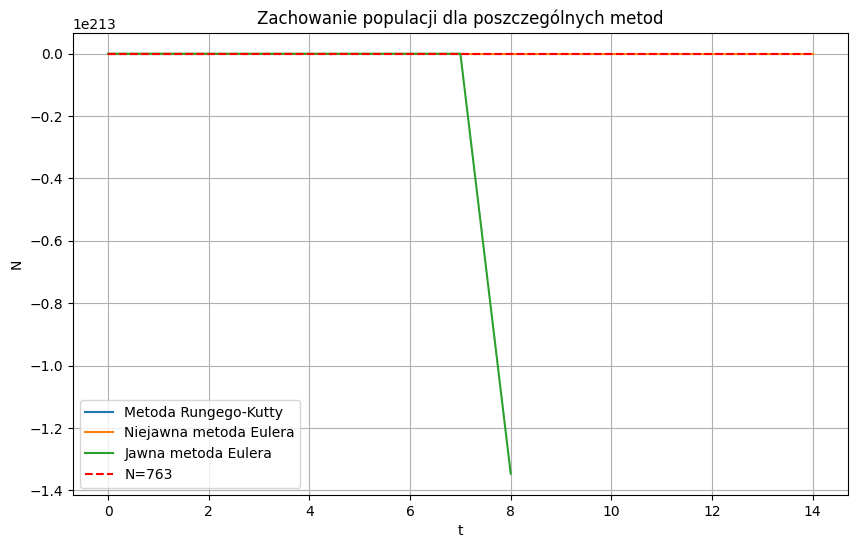

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(t, R_RG+S_RG+I_RG,label="Metoda Rungego-Kutty")
plt.plot(t, S_implicit_euler + I_implicit_euler + R_implicit_euler, label="Niejawna metoda Eulera")
plt.plot(t, S_explicit_euler + I_explicit_euler + R_explicit_euler, label="Jawna metoda Eulera")
plt.grid()
plt.hlines(763,0,14,colors="red", linestyles="dashed",label=f"N={N}")
plt.legend()
plt.title("Zachowanie populacji dla poszczególnych metod")
plt.xlabel("t")
plt.ylabel("N")
plt.show()